In [82]:
#keras.applications.mobilenet_v2.MobileNetV2(input_shape=None, alpha=1.0, depth_multiplier=1, include_top=True, weights='imagenet', input_tensor=None, pooling=None, classes=1000)
#keras.applications.resnet50.ResNet50(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
#from keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.preprocessing import image
from keras.optimizers import Adam
#from keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Input
from keras.preprocessing.image import ImageDataGenerator
import keras
import numpy as np
import math, os, sys
#import coremltool

# constants
image_size = (224, 224)
train_data_dir = r'C:\Users\tvaru\Desktop\disease blight\Train' 
validation_data_dir = r'C:\Users\tvaru\Desktop\disease blight\valid'
nb_epoch = 2
#batch_size = 16
batch_size = 1
num_classes = 1

    
def get_model():
    input_tensor = Input(shape=(224, 224, 3))  # this assumes K.image_data_format() == 'channels_last'
    # create the base pre-trained model
    base_model = MobileNetV2(input_tensor=input_tensor,weights='imagenet',include_top=False)

    for layer in base_model.layers:
        layer.trainable=False

    x = base_model.output
    x = GlobalAveragePooling2D(data_format='channels_last')(x)
    x = Dense(num_classes, activation='softmax')(x)
    updatedModel = Model(base_model.input, x)
    
    return  updatedModel

def compile_model(compiledModel):
    compiledModel.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='adam',
                  metrics=['accuracy'])

def modelFitGenerator(fitModel):
    num_train_samples = sum([len(files) for r, d, files in os.walk(train_data_dir)])
    num_valid_samples = sum([len(files) for r, d, files in os.walk(validation_data_dir)])
    print("num_train_samples", num_train_samples)
    print("num_valid_samples", num_valid_samples)
    num_train_steps = math.floor(num_train_samples/batch_size)
    num_valid_steps = math.floor(num_valid_samples/batch_size)
    
    #train_datagen = ImageDataGenerator(  
     # rotation_range=90,      
      #horizontal_flip=True,    
      #vertical_flip=True,
      #zoom_range=0.4)
    train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input, rescale=1. / 255) #included in our dependencies

    test_datagen = ImageDataGenerator(rescale=1. / 255)

    train_generator = train_datagen.flow_from_directory(
      train_data_dir,
      target_size=image_size ,
      batch_size=batch_size,
      class_mode='categorical', shuffle=True
    )

    print("class", train_generator.class_indices)
    #for cls in train_generator.class_indices:
     #   print("class", train_generator.class_indices)
    
    validation_generator = test_datagen.flow_from_directory(
      validation_data_dir,
      target_size=image_size ,
      batch_size=batch_size,
      class_mode='categorical', shuffle=True
    )

    print("start history model")
    history = fitModel.fit_generator(
      train_generator,
      steps_per_epoch=num_train_steps,
      epochs=nb_epoch,
      validation_data=validation_generator,
      validation_steps=num_valid_steps)

#def saveCoreMLModel(kerasModel):
#    coreml_model = coremltools.converters.keras.convert(kerasModel,
#                                                    input_names=['input'],
#                                                    output_names=['probs'],
#                                                    image_input_names='input',
#                                                    predicted_feature_name='predictedMoney',
#                                                    class_labels = 'drive/Resnet/labels.txt')
#    coreml_model.save('mobileNetV2custom.mlmodel') 
#   print('CoreML model saved')

    
print("preparation done")

preparation done


In [83]:
    model = get_model()
    compile_model(model)
    modelFitGenerator(model)
   
    #saveCoreMLModel(model)

C:\Users\tvaru\Anaconda2\lib\site-packages\keras_applications\mobilenet_v2.py:295: UserWarning: MobileNet shape is undefined. Weights for input shape(224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


num_train_samples 44
num_valid_samples 8
Found 43 images belonging to 1 classes.
class {'leafblight': 0}
Found 8 images belonging to 1 classes.
start history model
Epoch 1/2
44/44 [==============================] - 63s 1s/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 2/2
44/44 [==============================] - 17s 398ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000


In [36]:
print(keras.utils.print_summary(model))

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_16[0][0]                   
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu

block_9_depthwise_BN (BatchNorm (None, 14, 14, 384)  1536        block_9_depthwise[0][0]          
__________________________________________________________________________________________________
block_9_depthwise_relu (ReLU)   (None, 14, 14, 384)  0           block_9_depthwise_BN[0][0]       
__________________________________________________________________________________________________
block_9_project (Conv2D)        (None, 14, 14, 64)   24576       block_9_depthwise_relu[0][0]     
__________________________________________________________________________________________________
block_9_project_BN (BatchNormal (None, 14, 14, 64)   256         block_9_project[0][0]            
__________________________________________________________________________________________________
block_9_add (Add)               (None, 14, 14, 64)   0           block_8_add[0][0]                
                                                                 block_9_project_BN[0][0]         
__________

In [84]:
#model = ResNet50(weights='imagenet')
#model = MobileNetV2(weights='imagenet')

print(keras.utils.print_summary(model))
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = "MobileNetV2-CustomTraining.h5"
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

model_path = os.path.join(save_dir, model_name)
model.save('mobilenetv2.h5')
print(model.output)

#img_path = 'elephantandtiger.jpg'
img_path = r'C:\Users\tvaru\Desktop\disease blight\Test\leafblight\download.JPG'
#img_path = 'dogbreed1.png'
#img_path = 'einsteen.png'

img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x, verbose=1)
#preds = model.predict_classes(x, verbose=1)
#y_proba = model.predict(x)
#y_classes = keras.np_utils.probas_to_classes(preds)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print(preds)
#print(y_classes)
#print('Predicted:', decode_predictions(preds, top=1)[0])

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_17[0][0]                   
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu

Tensor("dense_16/Softmax:0", shape=(?, 1), dtype=float32)
1/1 [==============================] - 14s 14s/step
[[1.]]


In [48]:
test_batches= ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(r'C:\Users\tvaru\Desktop\disease blight\Train' ,target_size=(224,224),batch_size=1,shuffle=False)

Found 4 images belonging to 1 classes.


In [52]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    

In [53]:
import numpy as np 
import tensorflow.keras
from tensorflow.keras import backend as K 
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.MobileNet import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib. pyplot as plt 
%matplotlib inline

In [67]:
cm=confusion_matrix(test_labels,[1,1,1,1])

In [68]:
test_labels=test_batches.classes

In [69]:
test_labels


array([0, 0, 0, 0])

In [51]:
test_batches.class_indices


{'leafblight': 0}

In [55]:
predictions=model.predict_generator(test_batches,steps=1,verbose=0)

In [56]:
predictions

array([[1.]], dtype=float32)

In [77]:
model.save('mobilenetv2.model')

In [81]:
new_model = tensorflow.keras.models.load_model('my_model.model')


OSError: Unable to open file (unable to open file: name = 'my_model.model', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

Confusion matrix, without normalization
[[0 4]
 [0 0]]


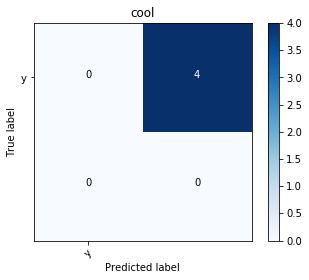

In [71]:

cm_plot_labels=['y']
plot_confusion_matrix(cm,cm_plot_labels,title="cool")